In [1]:
import torch

In [5]:
torch.hub.load('ultralytics/yolov5','yolov5m')

Using cache found in C:\Users\kunal/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-17 Python-3.9.13 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
  

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp21/weights/last.pt')

Using cache found in C:\Users\kunal/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-17 Python-3.9.13 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 212 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


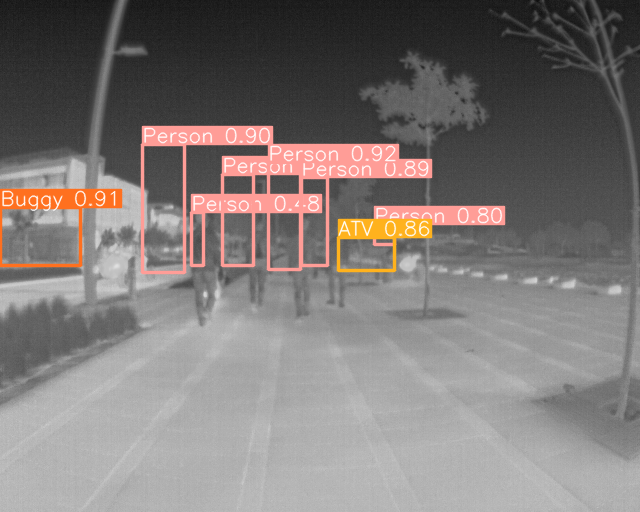

In [6]:
results = model('data/images/frame750.png')
results.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np

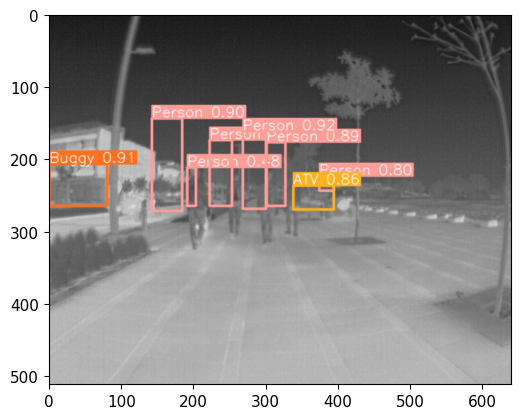

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [3]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [20]:
import os
import cv2
import numpy as np
import glob
import re
frameSize = (640, 512)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, frameSize)

path = os.path.join('data','images','*.png')
files =glob.glob(path)
for filename in sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0])):
    img = cv2.imread(filename)
    out.write(img)

out.release()

In [ ]:
import torch
import cv2
import os
import glob
import re

model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp21/weights/last.pt')

In [28]:
from utils.plots import colors

In [63]:
path = os.path.join('data','images','*.png')
savepath = os.path.join('runs','testruns')
files = glob.glob(path)
i = 0
names = model.names
for filename in sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0])):
    frame = cv2.imread(filename)
    detections = model(frame[..., ::-1])
    results = detections.pandas().xyxy[0].to_dict(orient="records")
    for result in results:
        con = result['confidence']
        cs = result['class']
        x1 = int(result['xmin'])
        y1 = int(result['ymin'])
        x2 = int(result['xmax'])
        y2 = int(result['ymax'])

        if cs==3: #ATV
            xoff = 40
            yoff = 10
        else:
            xoff = 50
            yoff = 50

        if(con >= .799):
            cv2.rectangle(frame, (x1+xoff, y1+yoff), (x2+xoff, y2+yoff), colors(cs, True), 3)
            cv2.putText(frame, f'{names[cs]} {con:.2f}',(x1+xoff, y1+yoff-10), 0, .5, colors(cs, True), 1)

    file_savepath = os.path.join(savepath, 'run'+str(i)+'.png')
    cv2.imwrite(file_savepath, frame)
    i+=1

In [64]:
import os
import cv2
import glob
import re
frameSize = (640, 512)

out = cv2.VideoWriter('final_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, frameSize)

path = os.path.join('runs','testruns','*.png')
files = glob.glob(path)
for filename in sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0])):
    img = cv2.imread(filename)
    out.write(img)

out.release()

Using cache found in C:\Users\kunal/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-17 Python-3.9.13 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 
